In [41]:
from importlib import reload
import qubic.job_manager_jpm as _jm
from matplotlib import pyplot as plt
import chipcalibration.rabi_experiments as _rabi
from distproc.hwconfig import FPGAConfig, load_channel_configs
import chipcalibration.config as _cfg
import qubic.rpc_client as _rc
import numpy as np

In [42]:
reload(_jm)
reload(_rabi)

<module 'chipcalibration.rabi_experiments' from '/home/jpmarceaux/chipcalibration/chipcalibration/rabi_experiments.py'>

In [43]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = _cfg.load_configs(qchipname, qchip_file='qubitcfg_jpm.json')

In [44]:
_jm.JobManager?

In [45]:
runner = _rc.CircuitRunnerClient(ip='192.168.1.247')
jm = _jm.JobManager(fpga_config, channel_config, runner, qchip)

# GMM Rabi

In [46]:
register = ['Q2', 'Q3']
target_amplitude = 0.4
pulse_width_interval = np.linspace(1e-9, 100e-9, 10)

In [47]:
gmm_rabi = _rabi.GMMRabi(register, target_amplitude, pulse_width_interval, 
                       channel_configs=channel_config)

In [48]:
gmm_rabi.circuits[10]

[{'name': 'delay', 't': 0.0004},
 {'name': 'rabi',
  'qubit': ['Q3'],
  'modi': {(0, 'twidth'): 1e-09},
  (0, 'amp'): 0.4},
 {'name': 'barrier', 'qubit': ['Q2', 'Q3']},
 {'name': 'read', 'qubit': ['Q2']},
 {'name': 'read', 'qubit': ['Q3']}]

In [ ]:
gmm_rabi.run_and_report(jm, 1000, qchip)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

ipdb> n_total_shots
1000
ipdb> read_per_shot
*** NameError: name 'read_per_shot' is not defined
ipdb> reads_per_shot


In [31]:
debug

> /home/jpmarceaux/anaconda3/envs/qubic/lib/python3.10/xmlrpc/client.py(552)dump_long()
    550     def dump_long(self, value, write):
    551         if value > MAXINT or value < MININT:
--> 552             raise OverflowError("int exceeds XML-RPC limits")
    553         write("<value><int>")
    554         write(str(int(value)))

ipdb> up
> /home/jpmarceaux/anaconda3/envs/qubic/lib/python3.10/xmlrpc/client.py(536)__dump()
    534             # for the p3yk merge, this should probably be fixed more neatly.
    535             f = self.dispatch["_arbitrary_instance"]
--> 536         f(self, value, write)
    537 
    538     def dump_nil (self, value, write):

ipdb> up
> /home/jpmarceaux/anaconda3/envs/qubic/lib/python3.10/xmlrpc/client.py(607)dump_struct()
    605                 raise TypeError("dictionary key must be string")
    606             write("<name>%s</name>\n" % escape(k))
--> 607             dump(v, write)
    608             write("</member>\n")
    609         write(

ipdb> up
> /home/jpmarceaux/anaconda3/envs/qubic/lib/python3.10/xmlrpc/client.py(514)dumps()
    512             for v in values:
    513                 write("<param>\n")
--> 514                 dump(v, write)
    515                 write("</param>\n")
    516             write("</params>\n")

ipdb> up
> /home/jpmarceaux/anaconda3/envs/qubic/lib/python3.10/xmlrpc/client.py(981)dumps()
    979         m = Marshaller(encoding, allow_none)
    980 
--> 981     data = m.dumps(params)
    982 
    983     if encoding != "utf-8":

ipdb> down
> /home/jpmarceaux/anaconda3/envs/qubic/lib/python3.10/xmlrpc/client.py(514)dumps()
    512             for v in values:
    513                 write("<param>\n")
--> 514                 dump(v, write)
    515                 write("</param>\n")
    516             write("</params>\n")

ipdb> v
ipdb> up
> /home/jpmarceaux/anaconda3/envs/qubic/lib/python3.10/xmlrpc/client.py(981)dumps()
    979         m = Marshaller(encoding, allow_none)
    980 
-->

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ipdb> up
> /home/jpmarceaux/software/qubic/job_manager_jpm.py(62)build_and_run_circuits()
     60             raise TypeError('{} invalid program list'.format(program_list))
     61 
---> 62         s11 = self.runner.run_circuit_batch(self.raw_asm_progs, n_total_shots, reads_per_shot, delay_per_shot)
     63 
     64         output_dict = {}

ipdb> program_list
[[{'name': 'delay', 't': 0.0004, 'qubit': ['Q2', 'Q3']}, {'name': 'rabi', 'qubit': ['Q2'], 'modi': {(0, 'twidth'): 1e-09}, (0, 'amp'): 0.4}, {'name': 'barrier', 'qubit': ['Q2', 'Q3']}, {'name': 'read', 'qubit': ['Q2']}, {'name': 'read', 'qubit': ['Q3']}], [{'name': 'delay', 't': 0.0004, 'qubit': ['Q2', 'Q3']}, {'name': 'rabi', 'qubit': ['Q2'], 'modi': {(0, 'twidth'): 1.2e-08}, (0, 'amp'): 0.4}, {'name': 'barrier', 'qubit': ['Q2', 'Q3']}, {'name': 'read', 'qubit': ['Q2']}, {'name': 'read', 'qubit': ['Q3']}], [{'name': 'delay', 't': 0.0004, 'qubit': ['Q2', 'Q3']}, {'name': 'rabi', 'qubit': ['Q2'], 'modi': {(0, 'twidth'): 2.2999999

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ipdb> self.compiled_progs
[<distproc.compiler.CompiledProgram object at 0x7fb45dd150f0>, <distproc.compiler.CompiledProgram object at 0x7fb45dd0ab30>, <distproc.compiler.CompiledProgram object at 0x7fb45dd152d0>, <distproc.compiler.CompiledProgram object at 0x7fb45dd14fa0>, <distproc.compiler.CompiledProgram object at 0x7fb45dd154e0>, <distproc.compiler.CompiledProgram object at 0x7fb45dd159f0>, <distproc.compiler.CompiledProgram object at 0x7fb45dd4ae60>, <distproc.compiler.CompiledProgram object at 0x7fb45dd4b790>, <distproc.compiler.CompiledProgram object at 0x7fb45dcffb80>, <distproc.compiler.CompiledProgram object at 0x7fb45dcffc40>, <distproc.compiler.CompiledProgram object at 0x7fb45dd4bd90>, <distproc.compiler.CompiledProgram object at 0x7fb45dd4bc10>, <distproc.compiler.CompiledProgram object at 0x7fb45dd91f00>, <distproc.compiler.CompiledProgram object at 0x7fb45dd92470>, <distproc.compiler.CompiledProgram object at 0x7fb45dcffee0>, <distproc.compiler.CompiledProgram object a

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ipdb> self.raw_asm_progs[0]
{'1': {'cmd_buf': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xb0\xa0\xa8a\x00\x00\x96\xc6\x08@\x00\x00\x02@\x00\x08\x90\x00\xa9a\x00 \x86\x08\x08@\x00\x00\x02\x00\xf4\t\x90\x80\xcea\x00@\xfe\xff\t@\xcd\xd4\x02\x00\xf4\t\x90\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0', 'env_buffers': [b'\x00\x00\x00\x00\x00\x00\xff?\x00\x00\xff\x7f\x00\x00\xff\x7f\x00\x00\xff\x7f\x00\x00\xff\x7f\x00\x00\xff\x7f\x00\x00\xff?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00\x05\x00\x00\x00\x08\x00\x00\x00\x0b\x00\x00\x00\x0f\x00\x00\x00\x14\x00\x00\x00\x1a\x00\x00\x00 \x00\x00\x00\'\x00\x00\x00.\x00\x00\x006\x00\x00\x00?\x00\x00\x00H\x00\x00\x00R\x00\x00\x00]\x00\x00\x00h\x00\x00\x00t\x00\x00\x00\x81\x00\x00\x00\x8e\x00\x00\x00\x9c\x00\x00\x00\xaa\x00\x00\x00\xb9\x00\x00\x00\xc9\x00\x

ipdb> exit


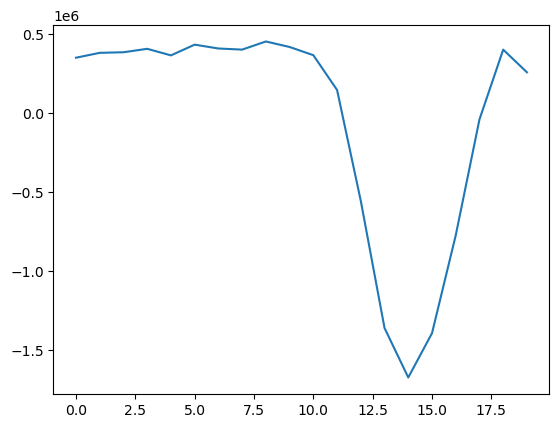

In [10]:
plt.plot(np.average(gmm_rabi.raw_iq_shots['1'].real, axis=1))

In [11]:
gmm_manager = gmm_rabi.gmm_manager

# Time Rabi

I'll target Q2, this time I'll use a jobmanager with a gmm manager 

In [12]:
reload(_rabi)

<module 'chipcalibration.rabi_experiments' from '/home/jpmarceaux/chipcalibration/chipcalibration/rabi_experiments.py'>

In [13]:
readout_register = ['Q1', 'Q2']
target_register = ['Q2']
target_amplitude = 0.3
pulse_width_interval = np.linspace(0, 100e-9, 10)

In [14]:
jm = _jm.JobManager(fpga_config, channel_config, runner, gmm_manager)

In [15]:
trabi = _rabi.TimeRabi(target_register, readout_register, target_amplitude, 
                      pulse_width_interval)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

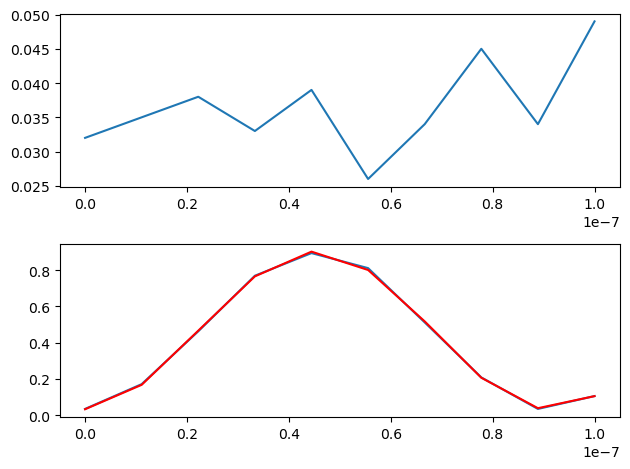

[2.3041020968692148e-08, 0.3]

In [16]:
trabi.run_and_report(jm, 1000, qchip, fit_type='period', period=90e-9)